# Dependencies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Getting the data

In [3]:
df = pd.read_csv('../data/Loan_Default.csv')
df.shape

(148670, 34)

# Columns Descriptions

| Column Name            | Description                                                                                           |
|---------------------------|--------------------------------------------------------------------------------------------------|
| ID                        | Client loan application ID                                                                      |
| year                      | Year of loan application                                                                         |
| loan_limit                | Indicates whether the loan is conforming (cf) or non-conforming (ncf)                           |
| Gender                    | Gender of the applicant (male, female, joint, sex not available)                               |
| approv_in_adv             | Indicates whether the loan was approved in advance (pre, nopre)                                 |
| loan_type                 | Type of loan (type1, type2, type3)                                                               |
| loan_purpose              | Purpose of the loan (p1, p2, p3, p4)                                                             |
| Credit_Worthiness         | Credit worthiness (l1, l2)                                                                       |
| open_credit               | Indicates whether the applicant has any open credit accounts (opc, nopc)                        |
| business_or_commercial    | Indicates whether the loan is for business/commercial purposes (ob/c - business/commercial, nob/c - personal) |
| loan_amount               | Amount of money being borrowed                                                                   |
| rate_of_interest          | Interest rate charged on the loan                                                                 |
| Interest_rate_spread      | Difference between the interest rate on the loan and a benchmark interest rate                    |
| Upfront_charges           | Initial charges associated with securing the loan                                                 |
| term                      | Duration of the loan in months                                                                    |
| Neg_ammortization         | Indicates whether the loan allows for negative amortization (neg_amm, not_neg)                   |
| interest_only             | Indicates whether the loan has an interest-only payment option (int_only, not_int)                |
| lump_sum_payment          | Indicates if a lump sum payment is required at the end of the loan term (lpsm, not_lpsm)          |
| property_value            | Value of the property being financed                                                               |
| construction_type         | Type of construction (sb - site built, mh - manufactured home)                                   |
| occupancy_type            | Occupancy type (pr - primary residence, sr- secondary residence, ir - investment property)        |
| Secured_by                | Specifies the type of collateral securing the loan (home, land)                                  |
| total_units               | Number of units in the property being financed (1U, 2U, 3U, 4U)                                 |
| income                    | Applicant's annual income                                                                         |
| credit_type               | Applicant's type of credit (CIB - Credit Information Bureau, CRIF - CIRF Credit Information Bureau, EXP - Experian, EQUI - Equifax) |
| Credit_Score              | Applicant's credit score                                                                          |
| co-applicant_credit_type  | Co-applicant's type of credit (CIB - Credit Information Bureau, EXP - Experian)                  |
| age                       | The age of the applicant                                                                          |
| submission_of_application | Indicates how the application was submitted (to_inst - to institution, not_inst - not to institution) |
| LTV                       | Loan-to-value ratio, calculated as the loan amount divided by the property value                  |
| Region                    | Geographic region where the property is located (North, South, Central, North-East)              |
| Security_Type             | Type of security or collateral backing the loan (direct, indirect)                               |
| Status                    | Indicates whether the loan has been defaulted (1) or not (0)                                     |
| dtir1                     | Debt-to-income ratio                                                                              |


Text(0.5, 1.0, 'Stosunek pozytywnych wniosków do wszystkich wniosków \n w zależności od liczby jednostek')

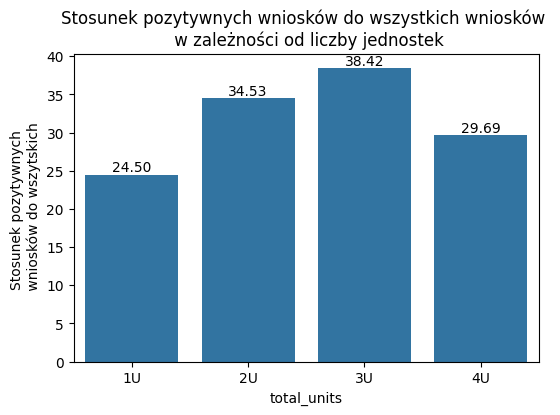

In [4]:
temp = df.groupby("total_units",as_index=False).agg({'Status': 'mean'}).assign(Procent=lambda x: x['Status']* 100).drop(columns='Status') 
fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(temp, x='total_units', y='Procent', ax=ax)


for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",(p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', 
        va='bottom' 
    )
ax.set_ylabel('Stosunek pozytywnych \n wniosków do wszytskich')
ax.set_title('Stosunek pozytywnych wniosków do wszystkich wniosków \n w zależności od liczby jednostek')

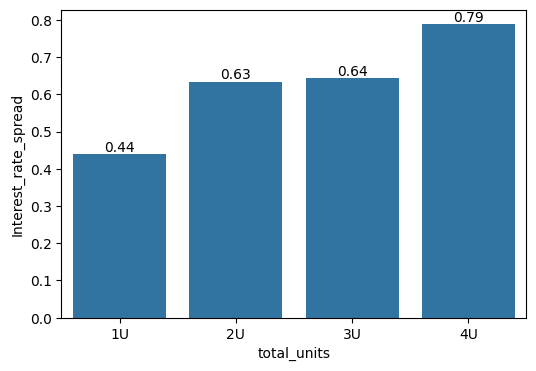

In [7]:
temp = df.groupby("total_units",as_index=False)["Interest_rate_spread"].mean()

fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(temp, x='total_units', y="Interest_rate_spread", ax=ax)


for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",(p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', 
        va='bottom' 
    )

# Missing Values for categorical columns

[Text(0, 0, 'Upfront_charges'),
 Text(1, 0, 'Interest_rate_spread'),
 Text(2, 0, 'rate_of_interest'),
 Text(3, 0, 'dtir1'),
 Text(4, 0, 'LTV'),
 Text(5, 0, 'property_value'),
 Text(6, 0, 'income'),
 Text(7, 0, 'loan_limit'),
 Text(8, 0, 'approv_in_adv'),
 Text(9, 0, 'submission_of_application'),
 Text(10, 0, 'age'),
 Text(11, 0, 'loan_purpose'),
 Text(12, 0, 'Neg_ammortization'),
 Text(13, 0, 'term'),
 Text(14, 0, 'Region'),
 Text(15, 0, 'total_units'),
 Text(16, 0, 'Security_Type'),
 Text(17, 0, 'Status'),
 Text(18, 0, 'co-applicant_credit_type'),
 Text(19, 0, 'Credit_Score'),
 Text(20, 0, 'credit_type'),
 Text(21, 0, 'ID'),
 Text(22, 0, 'Secured_by'),
 Text(23, 0, 'occupancy_type'),
 Text(24, 0, 'construction_type'),
 Text(25, 0, 'year'),
 Text(26, 0, 'interest_only'),
 Text(27, 0, 'loan_amount'),
 Text(28, 0, 'business_or_commercial'),
 Text(29, 0, 'open_credit'),
 Text(30, 0, 'Credit_Worthiness'),
 Text(31, 0, 'loan_type'),
 Text(32, 0, 'Gender'),
 Text(33, 0, 'lump_sum_payment')]

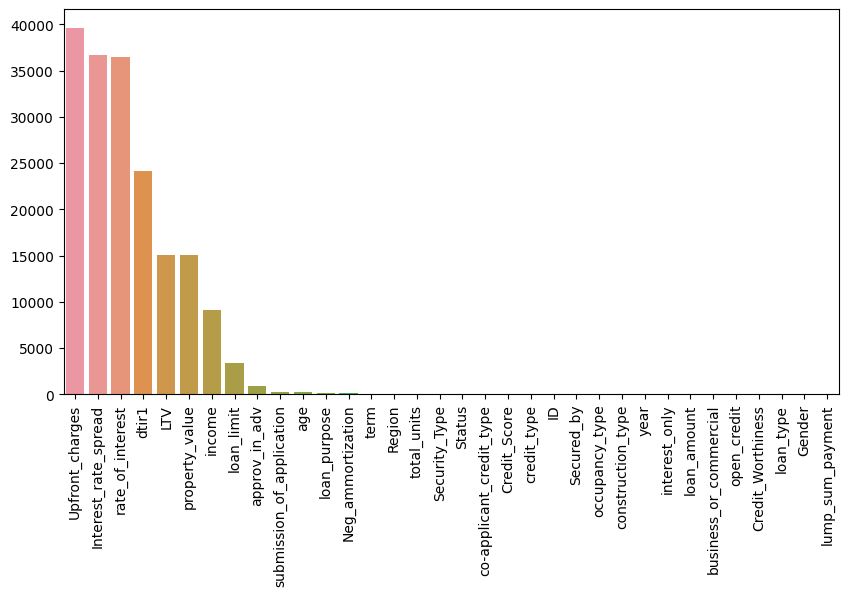

In [7]:
plt.figure(figsize=(10, 5))
sorted_series = df.isna().sum().sort_values(ascending=False)
g = sns.barplot(x=sorted_series.index, y=sorted_series.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
temp = df.groupby("total_units",as_index=False).agg({'Status': 'mean'}).assign(Procent=lambda x: x['Status']* 100).drop(columns='Status') 
fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(temp, x='total_units', y='Procent', ax=ax)


for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",(p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', 
        va='bottom' 
    )
ax.set_ylabel('Stosunek pozytywnych \n wniosków do wszytskich')
ax.set_title('Stosunek pozytywnych wniosków do wszystkich wniosków \n w zależności od liczby jednostek')

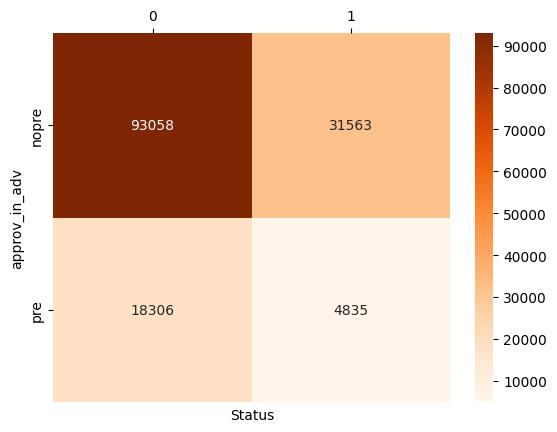

In [136]:
sns.heatmap(pd.crosstab(df["approv_in_adv"],df["Status"]),annot=True,fmt="d",cmap="Oranges")
plt.tick_params(axis='x',top=True,labeltop=True,bottom=False,labelbottom=False)

<Axes: xlabel='Debt', ylabel='income'>

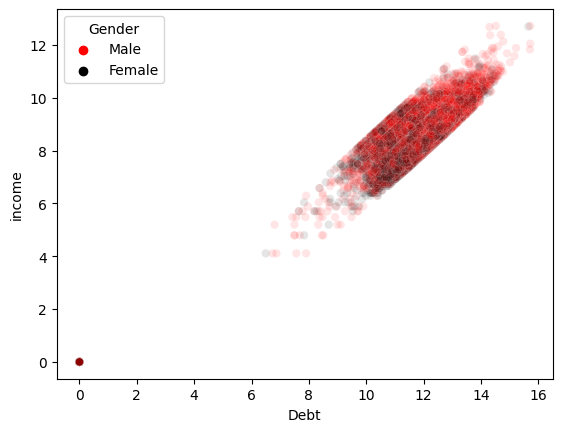

In [47]:
df["Debt"]=df["income"]*df["dtir1"]
df_exp = df[(df["Gender"]=="Female") | (df["Gender"]=="Male")]


sns.scatterplot(x=np.log1p(df_exp["Debt"]), y=np.log1p(df_exp["income"]), alpha=0.1, hue=df_exp["Gender"], palette={"Female":"black","Male":"red"})

(array([14831., 14906., 15001., 14856., 14796., 14668., 14708., 14816.,
        14889., 15199.]),
 array([500., 540., 580., 620., 660., 700., 740., 780., 820., 860., 900.]),
 <BarContainer object of 10 artists>)

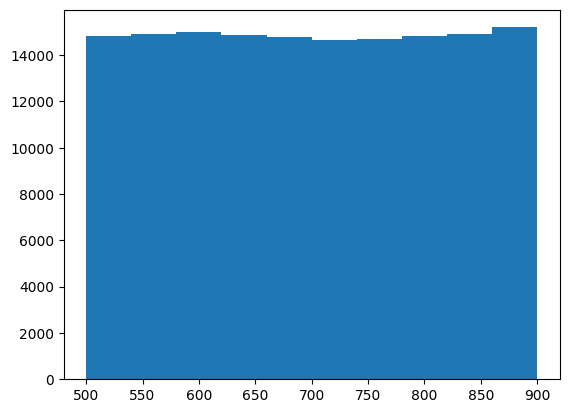

In [11]:
plt.hist(df["Credit_Score"])

Text(0.5, 1.0, 'q75 < CreditScore')

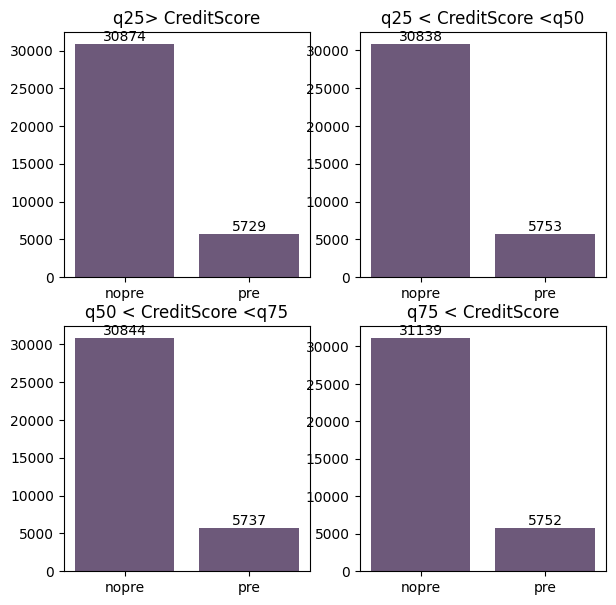

In [552]:
df["Credit_Score"] = pd.to_numeric(df["Credit_Score"])
q25 = df["Credit_Score"].quantile(0.25)
q50 = df["Credit_Score"].quantile(0.5)
q75 = df["Credit_Score"].quantile(0.75)

p1 = df[(q25> df["Credit_Score"])]["approv_in_adv"]

p2 = df[(q25 < df["Credit_Score"]) & (df["Credit_Score"] <q50) ]["approv_in_adv"]

p3 = df[(q50 < df["Credit_Score"]) & (df["Credit_Score"] <q75)]["approv_in_adv"]

p4 = df[(q75 < df["Credit_Score"])]["approv_in_adv"]


fig, axs = plt.subplots(2, 2, figsize=(7, 7))

axs[0, 0].bar(x=p1.value_counts().index,height=p1.value_counts().values)
axs[0, 0].set_title('q25> CreditScore')
axs[0,0].bar_label(axs[0,0].bar(x=p1.value_counts().index,height=p1.value_counts().values))


axs[0, 1].bar(x=p2.value_counts().index,height=p2.value_counts().values)
axs[0, 1].set_title('q25 < CreditScore <q50')
axs[0,1].bar_label(axs[0,1].bar(x=p2.value_counts().index,height=p2.value_counts().values))


axs[1, 0].bar(x=p3.value_counts().index,height=p3.value_counts().values)
axs[1, 0].set_title('q50 < CreditScore <q75')
axs[1,0].bar_label(axs[1,0].bar(x=p3.value_counts().index,height=p3.value_counts().values))


axs[1, 1].bar(x=p4.value_counts().index,height=p4.value_counts().values)
axs[1,1].bar_label(axs[1,1].bar(x=p4.value_counts().index,height=p4.value_counts().values))
axs[1, 1].set_title('q75 < CreditScore')


[Text(0, 0, 'pod inwestycje'), Text(1, 0, 'pierwsza'), Text(2, 0, 'druga')]

<Figure size 1000x500 with 0 Axes>

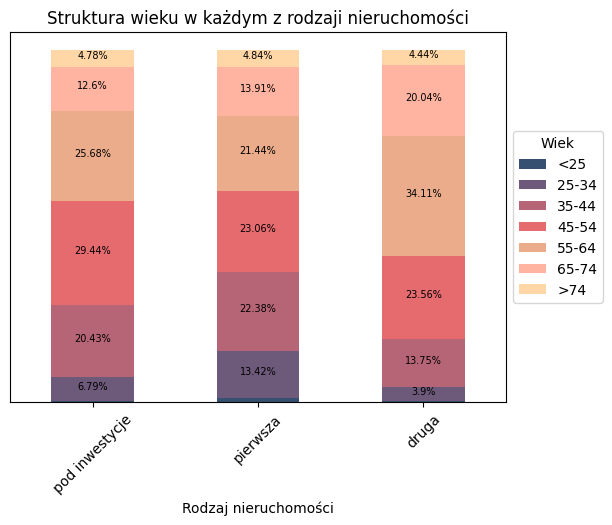

In [553]:
import numpy as np
new =df.groupby("occupancy_type")["age"].value_counts().unstack()
total = new.sum(axis=1)
new = new.div(total,axis=0).mul(100)
cols = ["<25"]+[col for col in new.columns if col != "<25"]
new =new[cols]
colors = ['#355070', '#6d597a', '#b56576', '#e56b6f', '#eaac8b','#ffb4a2', '#ffd6a5']
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(10, 5))
ax = new.plot(kind="bar",stacked=True,)
plt.title("Struktura wieku w każdym z rodzaji nieruchomości")
plt.xlabel("Rodzaj nieruchomości")
plt.yticks([])
ax.set_xticklabels(["pod inwestycje","pierwsza","druga"],rotation=45)
plt.legend(title="Wiek",bbox_to_anchor=(1, 0.5), loc='center left')


data_temp =new.iloc[:,:].cumsum(axis=1)
data_temp.columns = data_temp.columns.map(str)
data_temp
x = pd.DataFrame(index =data_temp.index)
for i,column in enumerate(data_temp.columns):
        if i ==0:
            x[column]=data_temp[column]/2
        else:
            x[column] = data_temp.iloc[:,i-1]+(data_temp.iloc[:,i]-data_temp.iloc[:,i-1])/2



xticks = ax.get_xticks()
for i in range(x.shape[0]):
    

    for j in range(x.shape[1]):
        value = new.iloc[i,j]
        if value >1:
            ax.text(xticks[i],x.iloc[i,j],s=f"{str(round(value,2))}%",ha='center',color="black",fontsize=7)

ax.set_xticklabels(["pod inwestycje","pierwsza","druga"],rotation=45)